<a href="https://colab.research.google.com/github/manish284/Machine-Learning/blob/master/Credit_Card_Fraud_Detection_Predictive_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connection building to kaggle for downloading data


In [ ]:
import os
import json

In [ ]:
if not os.path.exists(os.path.join(os.getcwd(),'kaggle')):
  os.mkdir(os.path.join(os.getcwd(),'kaggle'))

In [ ]:
token = {"username":"manish284","key":"66a5da80350480b19bf8fa46b6fbdb24"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

## Downloading Data from Kaggle

In [ ]:
if not os.path.exists(os.path.join(os.getcwd(),'data')):
  os.mkdir(os.path.join(os.getcwd(),'data'))

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud -p /content/data

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/data/creditcardfraud.zip -d /content/data

Archive:  /content/data/creditcardfraud.zip
replace /content/data/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/creditcard.csv  


## **Reading data**

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
data_df = pd.read_csv(os.path.join(os.getcwd(),'data/creditcard.csv'))

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Principal components analysis (PCA)

Principal components analysis (PCA) is a dimensionality reduction technique that enables you to identify correlations and patterns in a data set so that it can be transformed into a data set of significantly lower dimension without loss of any important information.

The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data
2. Computing the covariance matrix
3. Calculating the eigenvectors and eigenvalues
4. Computing the Principal Components
5. Reducing the dimensions of the data set

Scaling :

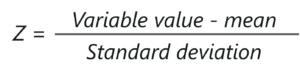

Variance: - The average of the squared differences from the Mean

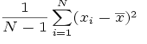

Standard deviation: -it is the square root of the Variance

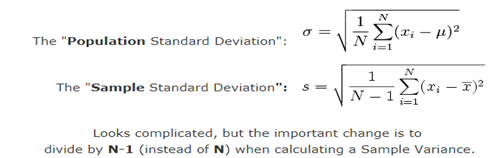

Correlation: - A correlation is a single number that describes the degree of relationship between two variables.

Correlation = Covarience/(Standard deviation of X * Standard deviation of Y)

Covariance: - Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

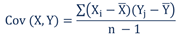

eigenvectors and eigenvalues

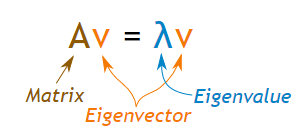

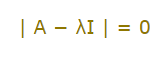


In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.

In [ ]:
data_df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [ ]:
data_df[data_df['Amount']== -1]

Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

## Data Preproccessing

In [ ]:
# misisng data

In [ ]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Class  V14   V1   V2   V3   V4  ...  V24  V25  V26  V27  V28  Time
Total      0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0
Percent    0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   0.0

[2 rows x 31 columns]

In [ ]:
# data balance

Techniques To Process unbalanced Data:

1. Over Sampling - Synthetic Minority Over-sampling TEchnique(SMOTE)
2. Under Sampling - K-means algorithm and the Tomek link
3. Ensemble Learning Techniques

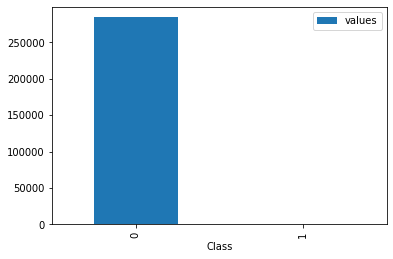

In [ ]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})
ax = df.plot.bar('Class','values')

In [ ]:
df

Class  values
0      0  284315
1      1     492

In [ ]:
#feature correlation

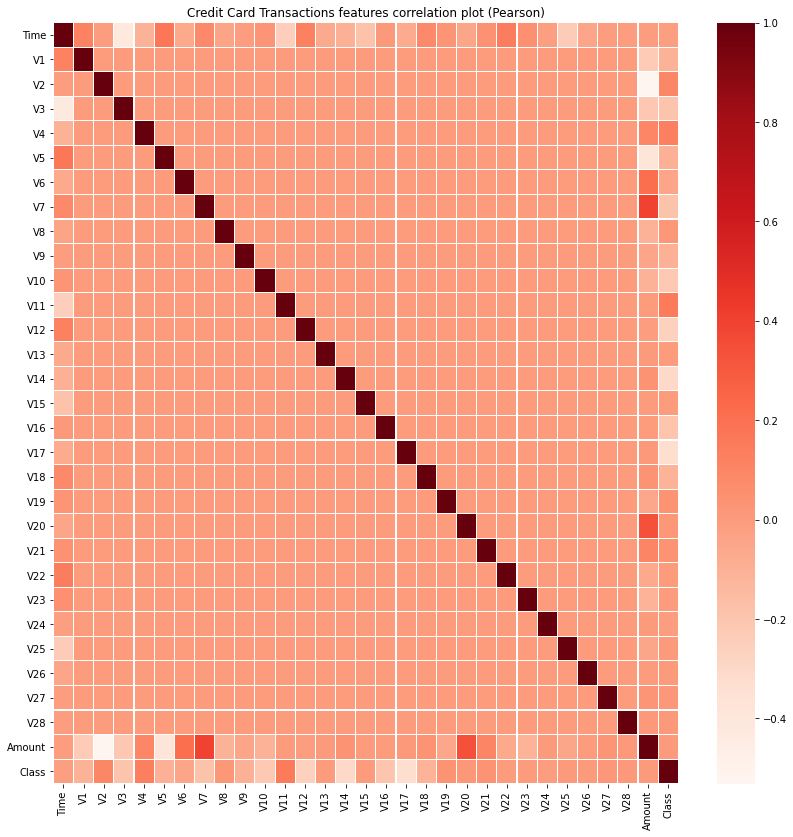

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

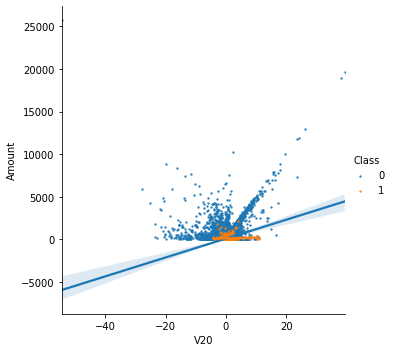

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
#s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

Seaborn's lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful for comparing numeric variables. ... If there are multiple instances of each variable along x, you can provide a reduction function to x_estimator to visualize a summary statistic such as the mean.

In [ ]:
# y = m * X  + c

In [ ]:
x_mean = data_df['V20'].mean()
y_mean = data_df['Amount'].mean()

Coefficient:
m= Σ [ (xi – x-mean)(yi – y-mean) ] / Σ [ (xi – x-mean)2]


In [ ]:
nu=0
de=0

In [ ]:
for i in range(len(data_df['V20'])):
  nu = nu + ((data_df['V20'][i]-x_mean) * (data_df['Amount'][i]-y_mean))
  de = de + ((data_df['V20'][i]-x_mean) ** 2)

In [ ]:
m = nu/de

In [ ]:
c = y_mean - m * x_mean

In [ ]:
y_ = m * data_df['V2'] + c

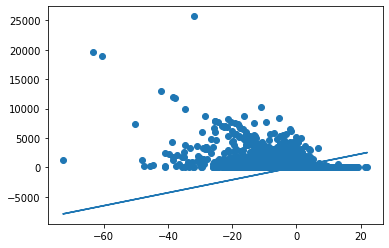

In [ ]:
plt.scatter(data_df['V2'],data_df['Amount'])
plt.plot(data_df['V2'],y_)
plt.show()

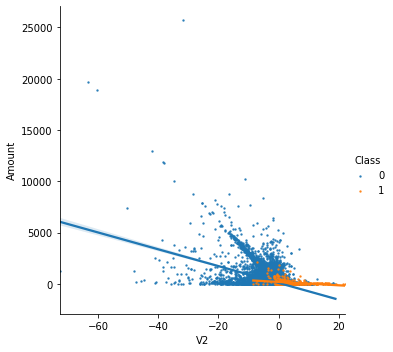

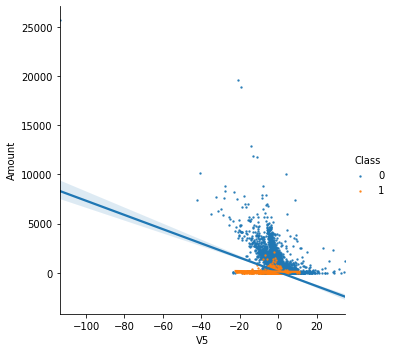

In [ ]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

In [ ]:
#Define predictors and target values

In [ ]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [ ]:
#Split data in train, test and validation set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

RANDOM_STATE = 2020

In [ ]:
train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [ ]:
train_df.head()

Time        V1        V2  ...       V28  Amount  Class
274372  165977.0  2.043725 -0.099641  ... -0.073311    0.89      0
280686  169685.0  2.112763  0.000335  ... -0.096296    1.16      0
231780  146921.0 -4.095183  4.327468  ... -0.176141    0.77      0
143612   85481.0 -1.373274  1.384824  ... -0.007433   72.72      0
107945   70689.0  0.163747  1.856372  ... -0.218191   29.99      0

[5 rows x 31 columns]

## **Predictive Model**

## Ensemble Classifier

Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model.

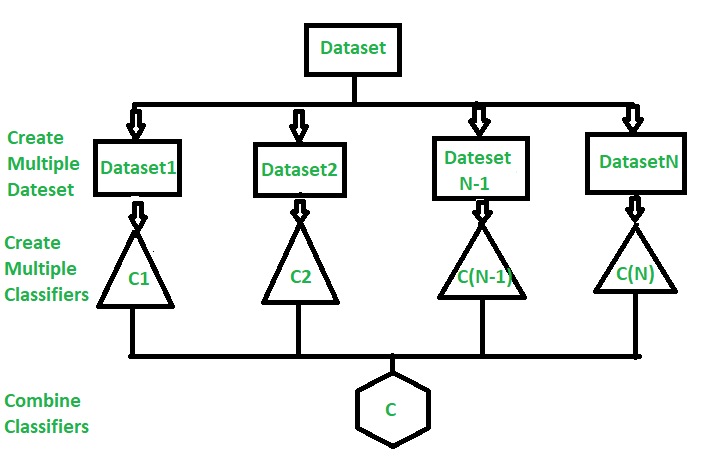

Types of Ensemble Classifier –

1. Bagging
2. Boosting


Differences Between Bagging and Boosting –

1.	Simplest way of combining predictions that
belong to the same type.	
A way of combining predictions that
belong to the different types.

2.	Aim to decrease variance, not bias.	
Aim to decrease bias, not variance.

3.	Each model receives equal weight.	
Models are weighted according to their performance.
4.	Each model is built independently.	
New models are influenced by performance of previously built models.

5.	Different training data subsets are randomly drawn with replacement from the entire training dataset.	
Every new subsets contains the elements that were misclassified by previous models.

6.	Bagging tries to solve over-fitting problem.	
Boosting tries to reduce bias.

7.	If the classifier is unstable (high variance), then apply bagging.	
If the classifier is stable and simple (high bias) the apply boosting.

8.	Random forest.	
Gradient boosting.


Similarities Between Bagging and Boosting –

Both are ensemble methods to get N learners from 1 learner.

Both generate several training data sets by random sampling.

Both make the final decision by averaging the N learners (or taking the majority of them i.e Majority Voting).

Both are good at reducing variance and provide higher stability.

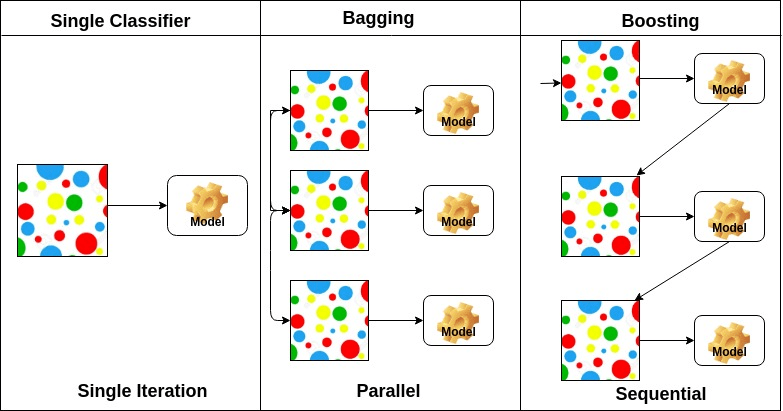

# RandomForestClssifiers

Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees. In the case of a classification problem, the final output is taken by using the majority voting classifier. In the case of a regression problem, the final output is the mean of all the outputs

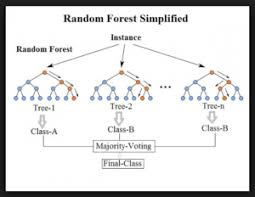

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC). Number of estimators is set to 100 and number of parallel jobs is set to 4.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

In [ ]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [ ]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2020, verbose=False,
                       warm_start=False)

In [ ]:
preds = clf.predict(valid_df[predictors])

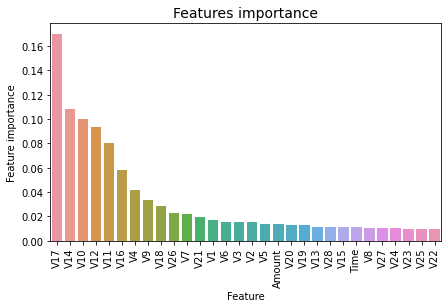

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

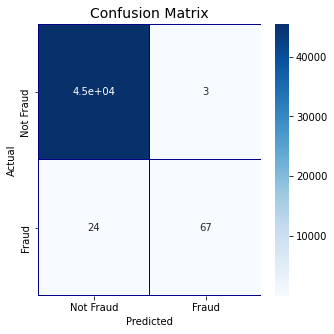

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
len(preds)

45569

In [ ]:
(45475 +3 +24 +76)

45578

In [ ]:
cm

Predicted      0   1
Actual              
0          45475   3
1             24  67

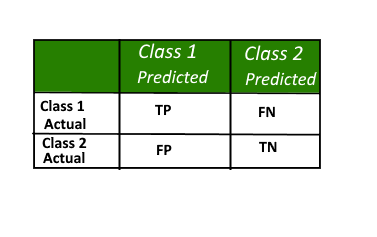

Class 1 : Positive

Class 2 : Negative

Definition of the Terms:

Positive (P) : Observation is positive (for example: is an apple).

Negative (N) : Observation is not positive (for example: is not an apple).

True Positive (TP) : Observation is positive, and is predicted to be positive.

False Negative (FN) : Observation is positive, but is predicted negative.

True Negative (TN) : Observation is negative, and is predicted to be negative.

False Positive (FP) : Observation is negative, but is predicted positive.

Classification Rate/Accuracy:

However, there are problems with accuracy. It assumes equal costs for both kinds of errors. A 99% accuracy can be excellent, good, mediocre, poor or terrible depending upon the problem.

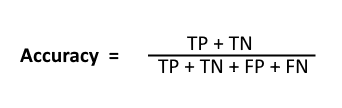

Recall:

Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN).

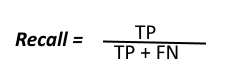

Precision:

To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labelled as positive is indeed positive (a small number of FP).

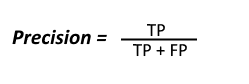

High recall, low precision:

This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

Low recall, high precision:

This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

F-measure:

Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more.

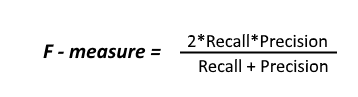

Type I error and Type II error

We need to clarify that confussion matrix are not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

Null Hypothesis (H0) - The transaction is not a fraud.
Alternative Hypothesis (H1) - The transaction is a fraud.

Type I error - You reject the null hypothesis when the null hypothesis is actually true.

Type II error - You fail to reject the null hypothesis when the the alternative hypothesis is true.

Cost of Type I error - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.

Cost of Type II error - You erroneously presume that the transaction is not a fraud and a ffraudulent transaction is accepted.

The following image explains what Type I error and Type II error are:

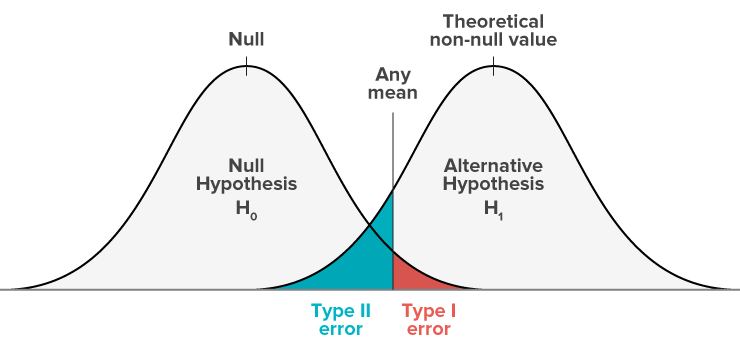


And this alternative image explains even better:

![image.png](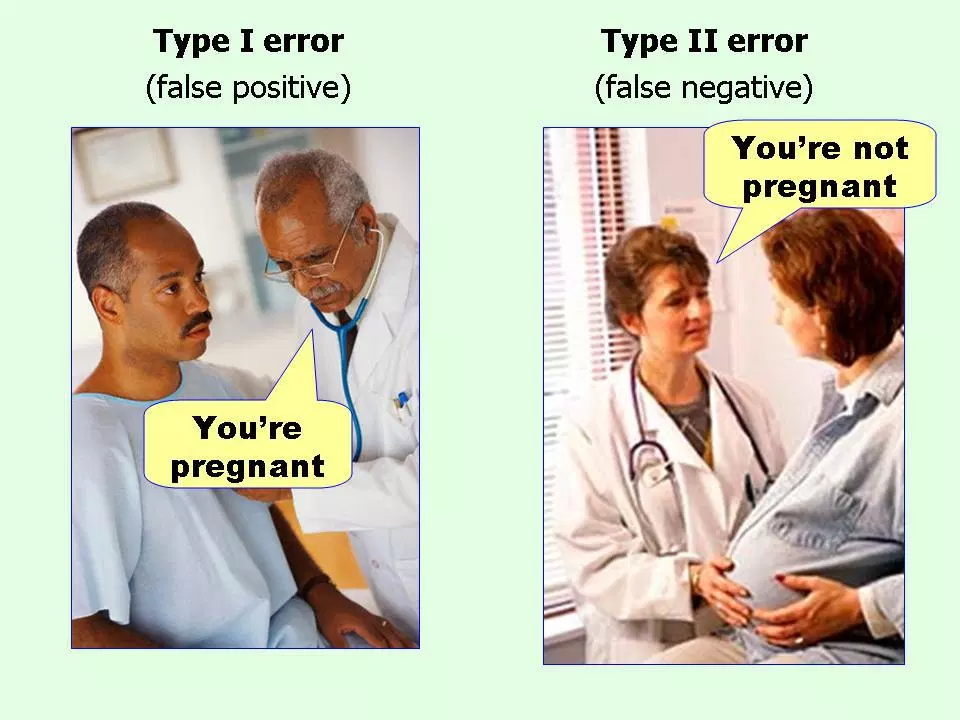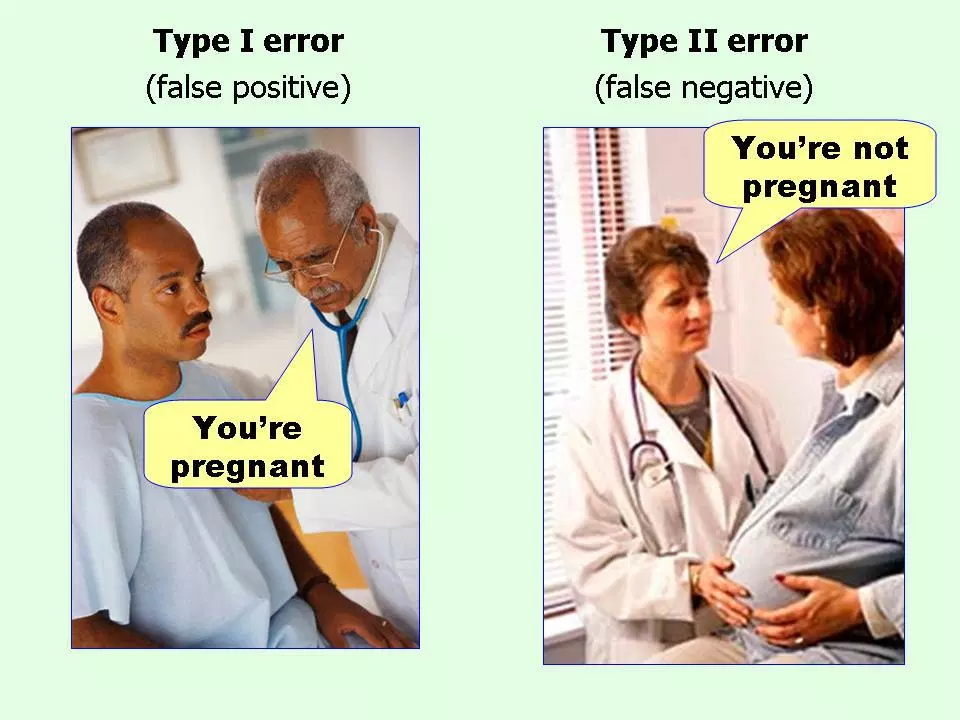)


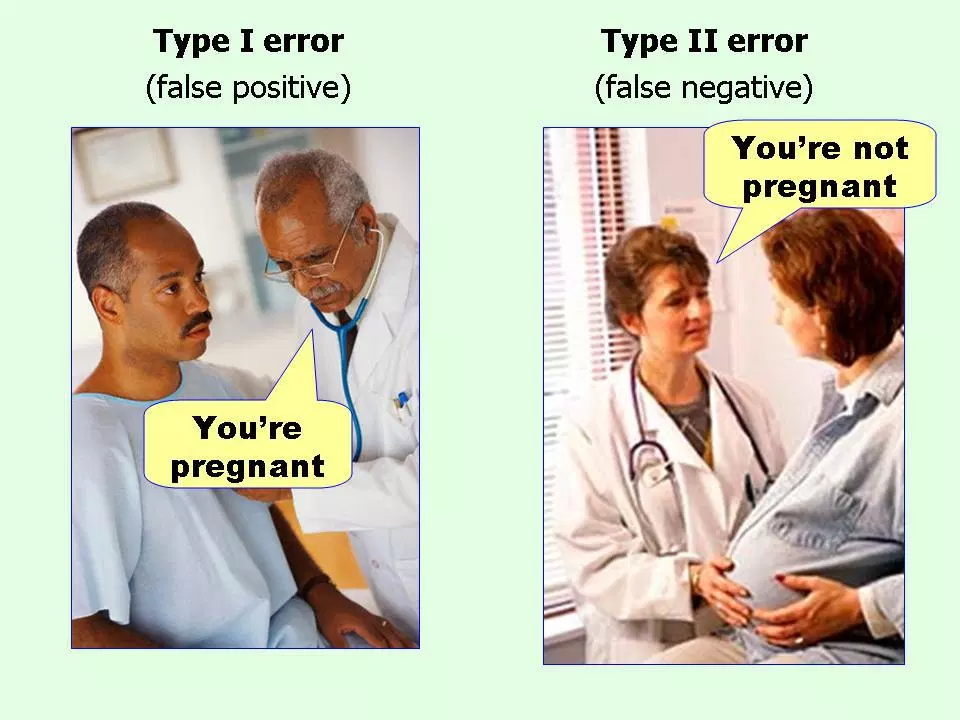

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.8680988851510862

Area under the Receiver Operating Characteristic curve: 0.8680988851510862


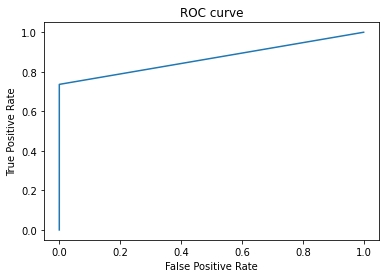

In [ ]:
fpr, tpr, thresholds = roc_curve(valid_df[target].values, preds)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(valid_df[target].values, preds))

ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

This curve plots two parameters:

True Positive Rate (TPR)

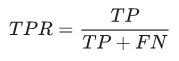

False Positive Rate (FPR)

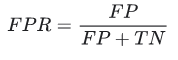

AUC: Area Under the ROC Curve

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

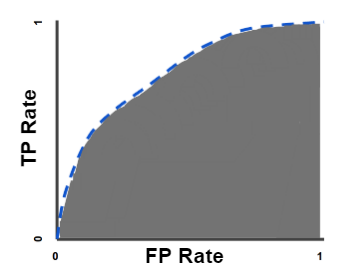

## AdaBoostClassifier

Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set

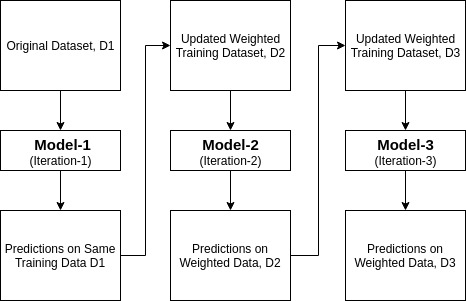

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [ ]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=2020)

In [ ]:
preds = clf.predict(valid_df[predictors])

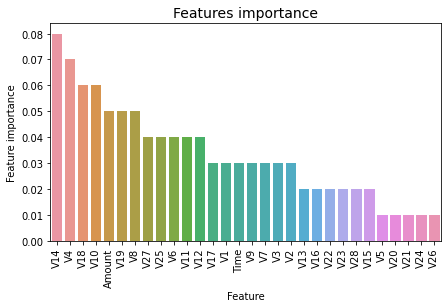

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

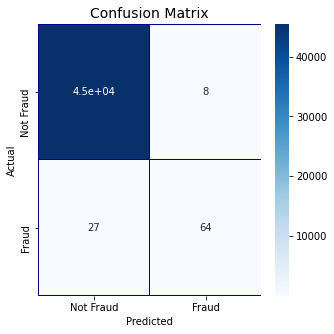

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.8515603970329333

Area under the Receiver Operating Characteristic curve: 0.8515603970329333


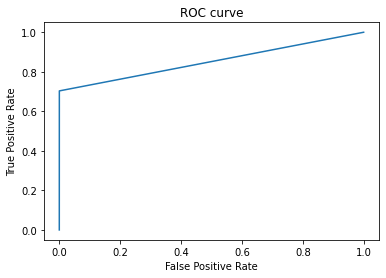

In [ ]:
fpr, tpr, thresholds = roc_curve(valid_df[target].values, preds)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(valid_df[target].values, preds))

# XGBoost 

In [ ]:
import xgboost as xgb

we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains

In [ ]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

In [ ]:
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [ ]:
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE
MAX_ROUNDS = 1000
EARLY_STOP = 50
VERBOSE_EVAL = 50

In [ ]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.878083	valid-auc:0.873512
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.918589	valid-auc:0.922848
[100]	train-auc:0.94676	valid-auc:0.948021
[150]	train-auc:0.97424	valid-auc:0.968391
[200]	train-auc:0.987966	valid-auc:0.976865
Stopping. Best iteration:
[193]	train-auc:0.987245	valid-auc:0.979944



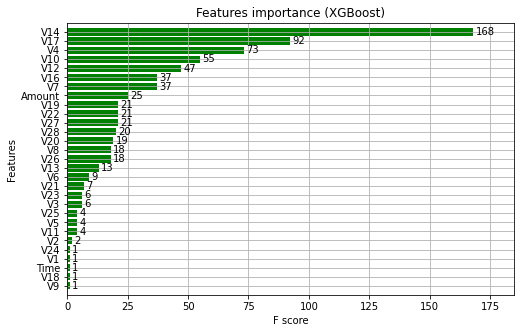

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [ ]:
preds = model.predict(dtest)

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.9859054491770087

## KFold with LightGBMClassifier

In machine learning, we couldn’t fit the model on the training data and can’t say that the model will work accurately for the real data. For this, we must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

K-Fold Cross Validation

we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import gc

In [ ]:
NUMBER_KFOLDS = 5

In [ ]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]
    
    evals_results = {}
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= VERBOSE_EVAL, early_stopping_rounds= EARLY_STOP)
    
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    #del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)   

Training until validation scores don't improve for 50 rounds.
[50]	training's auc: 0.969446	valid_1's auc: 0.959516
[100]	training's auc: 0.975391	valid_1's auc: 0.962895
Early stopping, best iteration is:
[72]	training's auc: 0.976315	valid_1's auc: 0.967322
Fold  1 AUC : 0.967322
Training until validation scores don't improve for 50 rounds.
[50]	training's auc: 0.976681	valid_1's auc: 0.952957
Early stopping, best iteration is:
[41]	training's auc: 0.978371	valid_1's auc: 0.949288
Fold  2 AUC : 0.949288
Training until validation scores don't improve for 50 rounds.
[50]	training's auc: 0.974153	valid_1's auc: 0.963634
Early stopping, best iteration is:
[36]	training's auc: 0.97727	valid_1's auc: 0.966828
Fold  3 AUC : 0.966828
Training until validation scores don't improve for 50 rounds.
[50]	training's auc: 0.970799	valid_1's auc: 0.975831
Early stopping, best iteration is:
[46]	training's auc: 0.97193	valid_1's auc: 0.97691
Fold  4 AUC : 0.976910
Training until validation scores don

In [ ]:
#save the model

In [ ]:
import pickle

In [ ]:
Pkl_Filename = "LGBMClassifier_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
with open(Pkl_Filename, 'rb') as file:  
    New_LGBMClassifier_Model = pickle.load(file)

In [ ]:
New_LGBMClassifier_Model.learning_rate

0.01